# MNIST Classification - Five Layer NN

In [18]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import numpy as np
from matplotlib import pyplot as plt
import math
tf.set_random_seed(0)

In [19]:
# download train and test data (28x28 images of handwritten digits)
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [53]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# learning rate
lr = tf.placeholder(tf.float32)

pkeep = tf.placeholder(tf.float32)

# weights
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1))
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))

# biases
b1 = tf.Variable(tf.ones([200])/10)
b2 = tf.Variable(tf.ones([100])/10)
b3 = tf.Variable(tf.ones([60])/10)
b4 = tf.Variable(tf.ones([30])/10)
b5 = tf.Variable(tf.ones([10])/10)

In [54]:
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 784])

In [55]:
# The model
Y1 = tf.nn.relu(tf.matmul(XX, W1) + b1)

Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + b2)

Y2d = tf.nn.dropout(Y2, pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + b3)

Y3d = tf.nn.dropout(Y3, pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + b4)

Y4d = tf.nn.dropout(Y4, pkeep)

logits = tf.matmul(Y4d, W5) + b5
Y = tf.nn.softmax(logits)

In [76]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [77]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [78]:
# to keep track of max accuracy
max_accuracy = 0.0

In [79]:
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

In [80]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

train_loss_log = []
test_loss_log = []
train_accuracy_log = []
test_accuracy_log = []

In [81]:
def training_step(i):

    global max_accuracy
    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    
    # learning rate decay
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    # compute training values
    if (i % 10 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y, pkeep: 1.0})
        train_accuracy_log.append([i,a])
        train_loss_log.append([i,c])        
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values
    if (i % 50 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
        test_accuracy_log.append([i,a])
        test_loss_log.append([i,c])  
        if (a > max_accuracy):
            max_accuracy = a

        print(str(i) + ": $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, lr: learning_rate, pkeep: 0.75})

In [82]:
# run this thang
for i in range(10000+1): 
    training_step(i)

0: accuracy:0.06 loss: 234.69196
0: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.1032 test loss: 231.98894
10: accuracy:0.52 loss: 195.14944
20: accuracy:0.58 loss: 125.26845
30: accuracy:0.7 loss: 100.16794
40: accuracy:0.73 loss: 72.40582
50: accuracy:0.77 loss: 64.80495
50: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.8108 test loss: 64.199844
60: accuracy:0.87 loss: 53.84128
70: accuracy:0.82 loss: 54.029446
80: accuracy:0.85 loss: 47.525078
90: accuracy:0.88 loss: 43.601353
100: accuracy:0.89 loss: 35.517124
100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.8857 test loss: 39.853306
110: accuracy:0.94 loss: 30.637663
120: accuracy:0.93 loss: 29.330877
130: accuracy:0.88 loss: 40.062836
140: accuracy:0.88 loss: 41.990482
150: accuracy:0.91 loss: 33.125244
150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9205 test loss: 28.209892
160: accuracy:0.93 loss: 21.465792
170: accuracy:0.94 loss: 18.487432
180: accuracy:0.97 loss: 14.95055
190: accuracy:0.91 loss: 19.986298
200: accuracy:0.91 loss: 30.842

1680: accuracy:0.98 loss: 12.15158
1690: accuracy:0.99 loss: 3.8730524
1700: accuracy:0.98 loss: 7.5563216
1700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.971 test loss: 11.118254
1710: accuracy:0.99 loss: 2.7234309
1720: accuracy:0.98 loss: 6.0290837
1730: accuracy:0.98 loss: 7.5725102
1740: accuracy:0.99 loss: 3.4550467
1750: accuracy:0.96 loss: 13.755603
1750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9726 test loss: 10.530559
1760: accuracy:0.97 loss: 12.772888
1770: accuracy:0.98 loss: 7.086918
1780: accuracy:0.97 loss: 9.182923
1790: accuracy:0.99 loss: 5.8809175
1800: accuracy:0.99 loss: 6.0830026
1800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9725 test loss: 10.219195
1810: accuracy:0.96 loss: 9.734425
1820: accuracy:0.97 loss: 11.910435
1830: accuracy:0.99 loss: 7.1035557
1840: accuracy:0.97 loss: 5.6776276
1850: accuracy:0.99 loss: 3.5203457
1850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.974 test loss: 10.132912
1860: accuracy:1.0 loss: 1.6498704
1870: accuracy:0.96 loss: 11.53

3320: accuracy:1.0 loss: 1.561561
3330: accuracy:0.97 loss: 10.292386
3340: accuracy:1.0 loss: 0.19592543
3350: accuracy:0.99 loss: 5.3473997
3350: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9778 test loss: 8.957282
3360: accuracy:0.97 loss: 10.736061
3370: accuracy:1.0 loss: 1.3372004
3380: accuracy:1.0 loss: 0.5910609
3390: accuracy:1.0 loss: 0.3228085
3400: accuracy:0.99 loss: 3.2257636
3400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9789 test loss: 8.345411
3410: accuracy:0.99 loss: 6.7996187
3420: accuracy:1.0 loss: 1.4180527
3430: accuracy:0.97 loss: 6.0893865
3440: accuracy:0.96 loss: 16.132608
3450: accuracy:1.0 loss: 0.12637678
3450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9779 test loss: 9.202924
3460: accuracy:1.0 loss: 1.6243579
3470: accuracy:0.99 loss: 3.58152
3480: accuracy:0.99 loss: 2.0350492
3490: accuracy:0.98 loss: 4.0622535
3500: accuracy:0.93 loss: 14.145321
3500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9788 test loss: 8.543225
3510: accuracy:0.98 loss: 6.5305815
3

5000: accuracy:1.0 loss: 0.24668181
5000: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9789 test loss: 8.957443
5010: accuracy:0.99 loss: 3.8703496
5020: accuracy:0.97 loss: 6.8839707
5030: accuracy:0.99 loss: 3.709779
5040: accuracy:0.96 loss: 7.9401493
5050: accuracy:0.99 loss: 6.02922
5050: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9778 test loss: 9.262205
5060: accuracy:0.97 loss: 3.307959
5070: accuracy:1.0 loss: 0.20759378
5080: accuracy:1.0 loss: 0.32526731
5090: accuracy:0.99 loss: 4.3525167
5100: accuracy:0.98 loss: 6.876703
5100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9805 test loss: 8.983343
5110: accuracy:1.0 loss: 0.08679403
5120: accuracy:0.99 loss: 4.2423797
5130: accuracy:1.0 loss: 0.24541
5140: accuracy:1.0 loss: 1.3237481
5150: accuracy:0.99 loss: 5.2455344
5150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9784 test loss: 8.853386
5160: accuracy:0.98 loss: 5.243561
5170: accuracy:0.99 loss: 10.141911
5180: accuracy:1.0 loss: 0.7728733
5190: accuracy:1.0 loss: 1.0517294
5200

6650: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9805 test loss: 9.132519
6660: accuracy:1.0 loss: 0.43270868
6670: accuracy:0.97 loss: 5.798263
6680: accuracy:1.0 loss: 0.48652235
6690: accuracy:0.99 loss: 2.6537523
6700: accuracy:1.0 loss: 1.6553216
6700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9802 test loss: 9.106402
6710: accuracy:0.98 loss: 5.1225424
6720: accuracy:0.98 loss: 3.8600962
6730: accuracy:1.0 loss: 0.68855864
6740: accuracy:0.99 loss: 3.0524917
6750: accuracy:1.0 loss: 0.3755614
6750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9806 test loss: 8.864397
6760: accuracy:0.99 loss: 2.1588364
6770: accuracy:1.0 loss: 0.1489747
6780: accuracy:0.99 loss: 1.3047864
6790: accuracy:1.0 loss: 0.34067526
6800: accuracy:1.0 loss: 0.31774652
6800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9804 test loss: 8.875695
6810: accuracy:1.0 loss: 1.5854727
6820: accuracy:0.99 loss: 3.6197438
6830: accuracy:0.99 loss: 2.5475042
6840: accuracy:0.99 loss: 1.5823215
6850: accuracy:1.0 loss: 0.907049

8320: accuracy:1.0 loss: 0.3772045
8330: accuracy:1.0 loss: 0.12753823
8340: accuracy:1.0 loss: 0.7810277
8350: accuracy:1.0 loss: 0.04795473
8350: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9805 test loss: 8.98874
8360: accuracy:1.0 loss: 0.28806296
8370: accuracy:0.98 loss: 9.268979
8380: accuracy:1.0 loss: 0.112759344
8390: accuracy:1.0 loss: 0.14207315
8400: accuracy:0.98 loss: 6.479874
8400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.981 test loss: 8.967711
8410: accuracy:1.0 loss: 0.3261296
8420: accuracy:0.99 loss: 1.8250118
8430: accuracy:0.99 loss: 4.9291654
8440: accuracy:0.99 loss: 2.8372412
8450: accuracy:1.0 loss: 0.19878493
8450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9808 test loss: 8.949106
8460: accuracy:0.99 loss: 1.1996531
8470: accuracy:0.99 loss: 6.955465
8480: accuracy:0.99 loss: 5.742991
8490: accuracy:0.98 loss: 4.5189853
8500: accuracy:0.99 loss: 2.1179116
8500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9809 test loss: 8.915498
8510: accuracy:0.99 loss: 8.154995
8

9960: accuracy:1.0 loss: 0.75433326
9970: accuracy:1.0 loss: 0.61234957
9980: accuracy:0.99 loss: 3.4868605
9990: accuracy:0.99 loss: 2.9312425
10000: accuracy:0.99 loss: 4.197525
10000: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9813 test loss: 8.89957


In [83]:
print("max test accuracy: " + str(max_accuracy))

max test accuracy: 0.9819


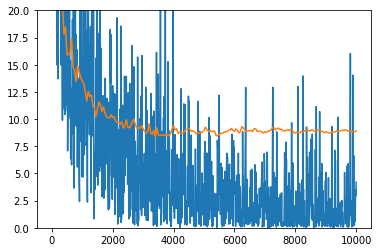

In [84]:
train_loss_log = np.array(train_loss_log)
test_loss_log = np.array(test_loss_log)

plt.plot(train_loss_log[:,0],train_loss_log[:,1])
plt.plot(test_loss_log[:,0],test_loss_log[:,1])
plt.ylim(top=20, bottom=0)
plt.show()

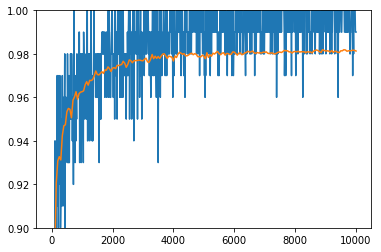

In [85]:
train_accuracy_log = np.array(train_accuracy_log)
test_accuracy_log = np.array(test_accuracy_log)

plt.plot(train_accuracy_log[:,0],train_accuracy_log[:,1])
plt.plot(test_accuracy_log[:,0],test_accuracy_log[:,1])
plt.ylim(top = 1, bottom=.9)
plt.show()